# Loading data

In [1]:
import pandas as pd

df = pd.read_csv('mustard++/Facial-Expression-Recognition.Pytorch-master/dependant_image_embeddings.csv')
df.head()

,ImageName,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,...,embed_246,embed_247,embed_248,embed_249,embed_250,embed_251,embed_252,embed_253,embed_254,embed_255
0,1_10004_u,0.225880,-0.158256,-0.166669,0.061559,0.061490,-0.127280,0.202243,-0.420007,0.017750,...,0.043996,0.237813,0.044273,-0.251303,0.176454,-0.067825,-0.255763,0.014547,0.411552,0.008522
1,1_10009_u,0.083695,-0.134326,-0.245697,0.065822,-0.059156,0.034589,-0.001629,0.015762,-0.117956,...,-0.158322,-0.008103,0.089971,0.054675,0.185983,-0.148866,-0.155370,0.067999,0.367675,0.082560
2,1_1001_u,0.105431,-0.061188,-0.176715,0.122682,0.072980,-0.042338,0.119878,-0.118731,-0.175453,...,0.121635,0.160505,0.091331,-0.093659,0.209373,0.014874,-0.181255,0.152046,0.253700,-0.038468
3,1_1003_u,0.118452,-0.078877,-0.113624,0.062875,0.110320,-0.154886,0.224045,-0.334346,-0.051198,...,0.183090,0.205164,0.064420,-0.214857,0.174033,-0.063176,-0.213527,0.078609,0.255371,-0.067467
4,1_10190_u,0.033148,-0.215622,-0.285165,0.128291,0.151158,-0.038314,0.059698,-0.374993,-0.019645,...,-0.042739,0.176863,0.065676,-0.181788,0.148470,-0.120253,-0.389759,-0.141423,0.539212,0.048756


In [2]:
labels = pd.read_csv('labels_final.csv')
labels.head()

,SCENE,Sarcasm
0,1_10004,0.0
1,1_10009,0.0
2,1_1001,0.0
3,1_1003,1.0
4,1_10190,0.0


# Preprocess and Cleaning

In [3]:
# Extracting the common scene name
df['SCENE'] = df['ImageName'].str.rsplit('_', 1).str[0]

text = pd.read_csv('text_final.csv', index_col='SCENE')
merged_df = pd.merge(df, text.iloc[:, -27:], on='SCENE', how='left')

# Merge the two dataframes on 'SCENE'
merged_df = pd.merge(merged_df, labels, on='SCENE', how='left')

# Drop auxiliary column and set index
merged_df.drop('SCENE', inplace=True, axis=1)
merged_df.set_index('ImageName', inplace=True)


C:\Users\vijet\AppData\Local\Temp\ipykernel_15832\3013097584.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  df['SCENE'] = df['ImageName'].str.rsplit('_', 1).str[0]


In [4]:
merged_df.dropna(inplace=True)
merged_df.head()

,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,embed_9,...,PERSON3,PHOEBE,RACHEL,RAJ,RICHARD,ROSE,ROSS,SHELDON,STUART,Sarcasm
ImageName,,,,,,,,,,,,,,,,,,,,,
1_10004_u,0.225880,-0.158256,-0.166669,0.061559,0.061490,-0.127280,0.202243,-0.420007,0.017750,0.094753,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1_10009_u,0.083695,-0.134326,-0.245697,0.065822,-0.059156,0.034589,-0.001629,0.015762,-0.117956,-0.053731,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1_1001_u,0.105431,-0.061188,-0.176715,0.122682,0.072980,-0.042338,0.119878,-0.118731,-0.175453,-0.062005,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1_1003_u,0.118452,-0.078877,-0.113624,0.062875,0.110320,-0.154886,0.224045,-0.334346,-0.051198,0.006231,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1_10190_u,0.033148,-0.215622,-0.285165,0.128291,0.151158,-0.038314,0.059698,-0.374993,-0.019645,0.111698,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Neural Network 

Epoch 1/500
7/7 [==============================] - 1s 31ms/step - loss: 0.7871 - accuracy: 0.5069 - val_loss: 0.6852 - val_accuracy: 0.5668 - lr: 0.0010
Epoch 2/500
7/7 [==============================] - 0s 8ms/step - loss: 0.7515 - accuracy: 0.5139 - val_loss: 0.6836 - val_accuracy: 0.5853 - lr: 0.0010
Epoch 3/500
7/7 [==============================] - 0s 8ms/step - loss: 0.7396 - accuracy: 0.5127 - val_loss: 0.6828 - val_accuracy: 0.5668 - lr: 0.0010
Epoch 4/500
7/7 [==============================] - 0s 8ms/step - loss: 0.7320 - accuracy: 0.4931 - val_loss: 0.6832 - val_accuracy: 0.5899 - lr: 0.0010
Epoch 5/500
7/7 [==============================] - 0s 8ms/step - loss: 0.7063 - accuracy: 0.5278 - val_loss: 0.6850 - val_accuracy: 0.5806 - lr: 0.0010
Epoch 6/500
7/7 [==============================] - 0s 8ms/step - loss: 0.7110 - accuracy: 0.5058 - val_loss: 0.6884 - val_accuracy: 0.5530 - lr: 0.0010
Epoch 7/500
7/7 [==============================] - 0s 7ms/step - loss: 0.7176 - accurac

7/7 [==============================] - 0s 8ms/step - loss: 0.5776 - accuracy: 0.6713 - val_loss: 0.6385 - val_accuracy: 0.5945 - lr: 0.0010
Epoch 108/500
7/7 [==============================] - 0s 7ms/step - loss: 0.5981 - accuracy: 0.6516 - val_loss: 0.6339 - val_accuracy: 0.6083 - lr: 0.0010
Epoch 109/500
7/7 [==============================] - 0s 8ms/step - loss: 0.5825 - accuracy: 0.6620 - val_loss: 0.6362 - val_accuracy: 0.6406 - lr: 0.0010
Epoch 110/500
7/7 [==============================] - 0s 8ms/step - loss: 0.6021 - accuracy: 0.6481 - val_loss: 0.6347 - val_accuracy: 0.6221 - lr: 0.0010
Epoch 111/500
7/7 [==============================] - 0s 8ms/step - loss: 0.5905 - accuracy: 0.6562 - val_loss: 0.6345 - val_accuracy: 0.6221 - lr: 0.0010
Epoch 112/500
7/7 [==============================] - 0s 8ms/step - loss: 0.5883 - accuracy: 0.6505 - val_loss: 0.6380 - val_accuracy: 0.6175 - lr: 0.0010
Epoch 113/500
7/7 [==============================] - 0s 8ms/step - loss: 0.5934 - accuracy

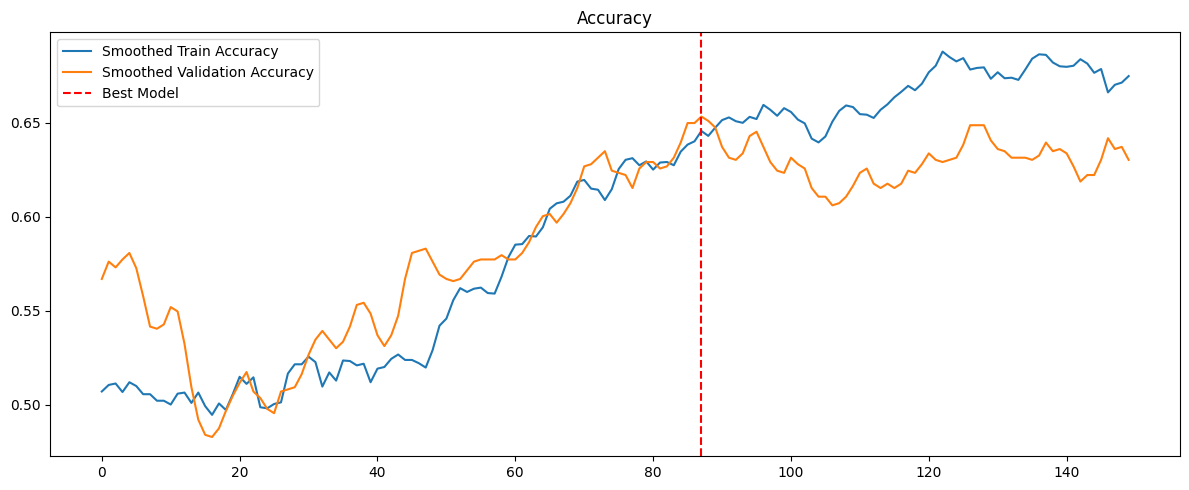

In [5]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Scale the input featuresa
scaler = StandardScaler()

# Features and labels
X = merged_df.drop(columns=['Sarcasm'])
y = merged_df['Sarcasm']

X_scaled = scaler.fit_transform(X)
y = y.astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# Define the model
model = Sequential()

model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.6))
model.add(BatchNormalization())

model.add(Dense(256, activation='relu' ))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu' ))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu' ))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu' ))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=5, min_lr=0.001)

# Set callback functions to early stop training
callbacks = [EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True),reduce_lr]

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=128, callbacks=callbacks, validation_split=0.2)

# Predict on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

import matplotlib.pyplot as plt

# Extract values from the history 
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

def moving_average(data, window_size=3):
    """Computes the moving average of a list."""
    return [np.mean(data[max(0, i - window_size):i+1]) for i in range(len(data))]

window_size = 3 
smooth_train_acc = moving_average(train_acc, window_size)
smooth_val_acc = moving_average(val_acc, window_size)
best_epoch = np.argmax(val_acc) 

plt.figure(figsize=(12, 5))

plt.subplot(1, 1, 1)
plt.plot(smooth_train_acc, label='Smoothed Train Accuracy')
plt.plot(smooth_val_acc, label='Smoothed Validation Accuracy')
plt.axvline(best_epoch, color='red', linestyle='--', label='Best Model')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()

#### Observation: No overfit seen

# Random Forest

In [36]:
def display_metrics(y_tes,y_pre):
    # Calculate metrics
    accuracy = accuracy_score(y_tes, y_pre)
    precision = precision_score(y_tes, y_pre)
    recall = recall_score(y_tes, y_pre)
    f1 = f1_score(y_tes, y_pre)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_rf.fit(X_train, y_train)

print("Best Parameters for Random Forest:", grid_rf.best_params_)

y_pred_rf = grid_rf.predict(X_test)

# Display metrics for XGBoost
print("RF Metrics:")

In [9]:
display_metrics(y_test, y_pred_rf)

Accuracy: 0.5454545454545454
Precision: 0.5573770491803278
Recall: 0.5483870967741935
F1 Score: 0.5528455284552846


#### Observation: Poor performance

# XGBoost

In [43]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xg = xgb.XGBClassifier()
param_grid_xg = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2,3,5],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.7, 0.9, 1]
}

grid_xg = GridSearchCV(estimator=xg, param_grid=param_grid_xg, cv=5, n_jobs=-1)
grid_xg.fit(X_train, y_train)

print("Best Parameters for XGBoost:", grid_xg.best_params_)

y_pred_xg = grid_xg.predict(X_test)

# Display metrics for XGBoost
print("XGBoost Metrics:")
display_metrics(y_test, y_pred_xg)


Best Parameters for XGBoost: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 100, 'subsample': 1}
XGBoost Metrics:
Accuracy: 0.6033057851239669
Precision: 0.85
Recall: 0.27419354838709675
F1 Score: 0.4146341463414634


In [44]:
y_pred_xg = grid_xg.predict(X_train)

# Display metrics for XGBoost
print("XGBoost Metrics:")
display_metrics(y_train, y_pred_xg)

XGBoost Metrics:
Accuracy: 0.6123959296947271
Precision: 0.8125
Recall: 0.2894248608534323
F1 Score: 0.426812585499316


#### Observation: Performance similar to neural network but neural networks have better recall and f1 score

# SVM

In [45]:
from sklearn.svm import SVC

svm = SVC(probability=True)  # 'probability=True' to ensure retrieval of probabilities
param_grid_svm = {
    'C': [ 1, 5, 10, 25], 
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5)
grid_svm.fit(X_train, y_train)

print("Best Parameters for SVM:", grid_svm.best_params_)

y_pred_svm = grid_svm.predict(X_test)

# Display metrics for SVM
print("SVM Metrics:")
display_metrics(y_test, y_pred_svm)


Best Parameters for SVM: {'C': 25, 'gamma': 0.001, 'kernel': 'sigmoid'}
SVM Metrics:
Accuracy: 0.5371900826446281
Precision: 0.5535714285714286
Recall: 0.5
F1 Score: 0.5254237288135594


In [46]:
y_pred_svm = grid_svm.predict(X_train)

# Display metrics for XGBoost
print("XGBoost Metrics:")
display_metrics(y_train, y_pred_svm)

XGBoost Metrics:
Accuracy: 0.5874190564292322
Precision: 0.5859519408502772
Recall: 0.588126159554731
F1 Score: 0.587037037037037


#### Observation: Poor performance

# Saving the best model

XGBoost and Neural networks have similar performance. Saving neural networks as final model since it has better recall and f1 score

In [30]:
model.save("dependant_image_model.h5")

C:\Users\vijet\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
